In [5]:
%matplotlib inline
import numpy as np 
import pandas as pd 
from scipy import sparse



In [6]:
eye = np.eye(4)
print("Numpy array : \n{}".format(eye))

Numpy array : 
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [7]:
import matplotlib.pyplot as plt

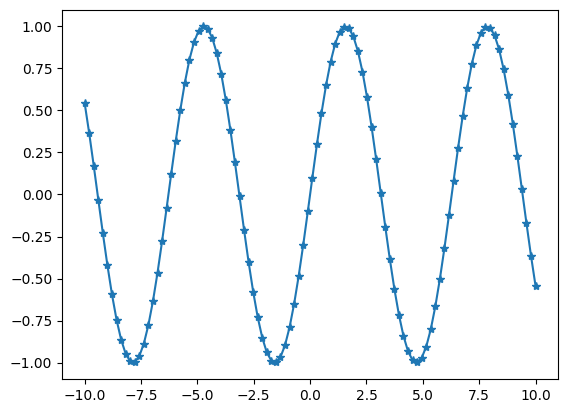

In [8]:
x = np.linspace(-10,10,100)
y = np.sin(x)
plt.plot(x,y,marker = "*")

In [9]:
import mglearn

In [10]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [11]:
print("Keys of iris dataset \n", format(iris_dataset.keys()))

Keys of iris dataset 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [12]:
print(iris_dataset['DESCR'][:193] + "\n")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive 



In [13]:
print("Target Name: {}", format(iris_dataset['target_names']))

Target Name: {} ['setosa' 'versicolor' 'virginica']


In [14]:
print("Feature Name: {}", format(iris_dataset['feature_names']))

Feature Name: {} ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [15]:
print("Shape of data: {}", format(iris_dataset['data'].shape))

Shape of data: {} (150, 4)


In [16]:
print("First five samples are:\n{}".format(iris_dataset['data'][:5]))

First five samples are:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [17]:
print("Type of data is :{}".format(type(iris_dataset['data'])))

Type of data is :<class 'numpy.ndarray'>


In [18]:
print("Target :\n{}".format(iris_dataset['target']))

Target :
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [19]:
X = iris_dataset['data']
y = iris_dataset['target']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=39)

In [22]:
print("X_train shape : {}\n".format(X_train.shape))

X_train shape : (120, 4)



In [23]:
print("y_train shape : {}\n".format(y_train.shape))

y_train shape : (120,)



In [24]:
from pandas.plotting import scatter_matrix

In [25]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

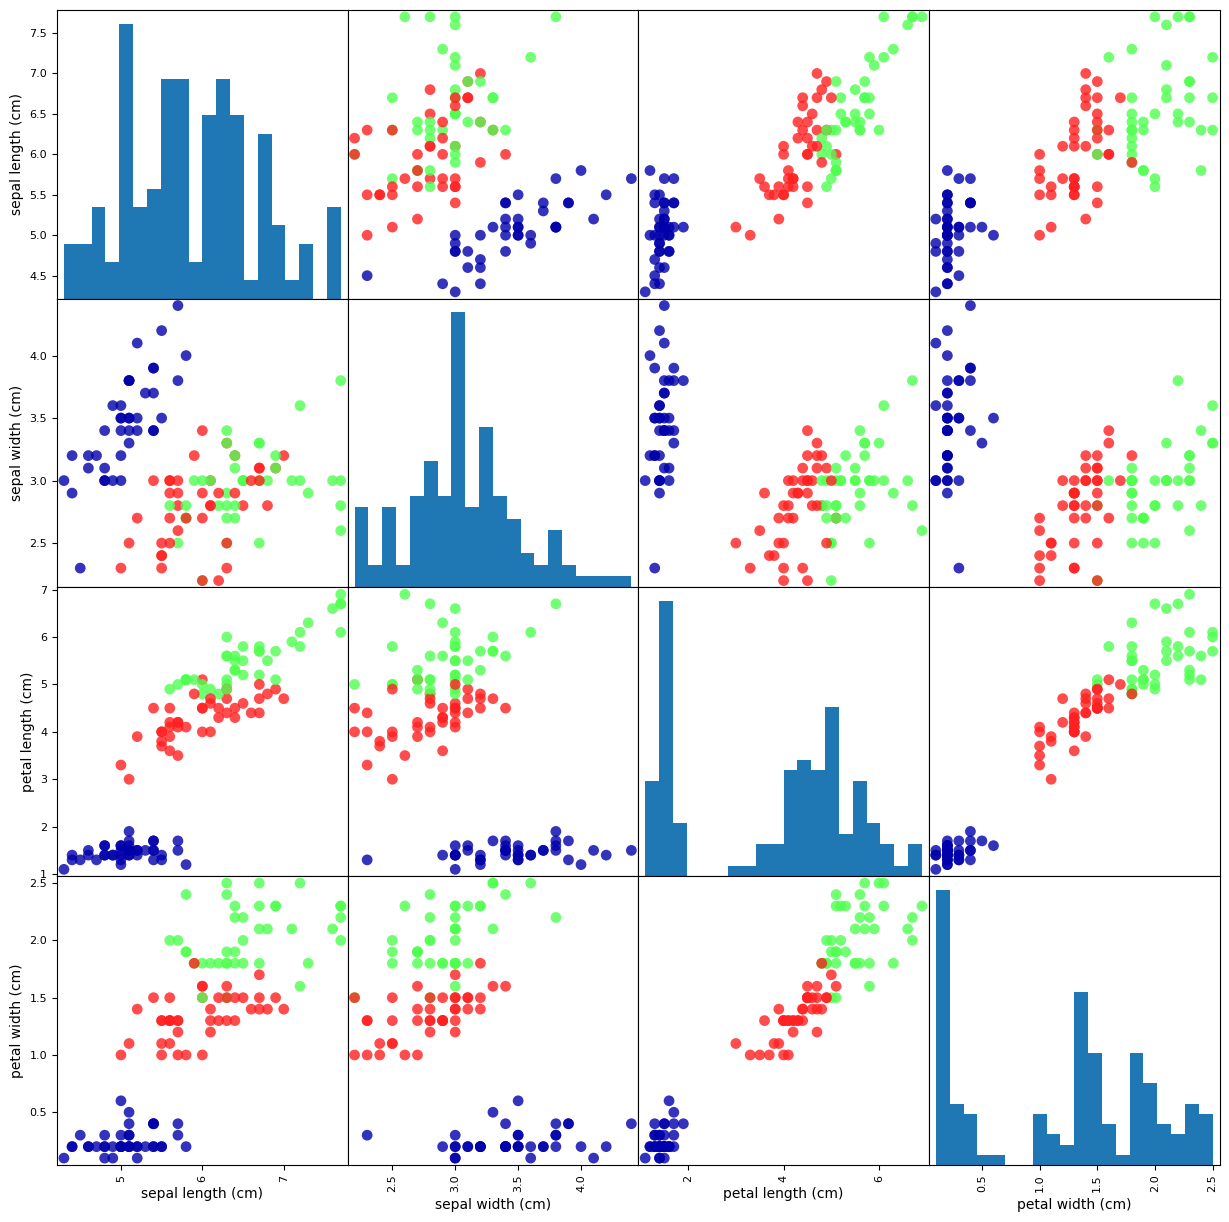

In [26]:
grr = scatter_matrix(iris_dataframe, 
                     c=y_train, 
                     figsize=(15, 15),
                     hist_kwds={'bins': 20},
                     s = 60,
                     marker='o', 
                     alpha=0.8, 
                     cmap=mglearn.cm3)

plt.show()

In [27]:
iris_dataframe.corr()

sepal length (cm)  ...  petal width (cm)
sepal length (cm)           1.000000  ...          0.814413
sepal width (cm)           -0.174600  ...         -0.411759
petal length (cm)           0.869827  ...          0.965086
petal width (cm)            0.814413  ...          1.000000

[4 rows x 4 columns]

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=1,n_jobs=1)

In [33]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=1, n_neighbors=1)

In [37]:
X_new = np.array([[5,2.9,1,0.2]])
print("X_new Shape :{} ".format(X_new.shape))

X_new Shape :(1, 4) 


In [40]:
prediction = knn.predict(X_new)
print("Prediction : {}".format(prediction))
print("Prediction target name: {}".format(iris_dataset['target_names'][prediction]))

Prediction : [0]
Prediction target name: ['setosa']


# Evaluating the Model

In [43]:
y_pred = knn.predict(X_test)
print("Test Set Prediction: {}".format(y_pred))

Test Set Prediction: [0 0 2 1 0 0 2 0 2 2 1 0 2 1 1 1 2 2 2 0 2 0 0 1 1 0 1 1 2 1]


In [44]:
print('Test Set Prediction : {:.2f}'.format(np.mean(y_pred == y_test)))

Test Set Prediction : 0.97


In [45]:
 print('KNN tests Set Prediction : {:.2f}'.format(knn.score(X_test,y_test)))

KNN tests Set Prediction : 0.97
